In [2]:
#Carga de paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Se realiza la recomendación a todo el equipo de trabajo que descargue el documento a su equipo local teniendo presente que el archivo arbolesUV.csv es el documento definitivo con el cual se trabajará.

In [3]:
#Conjunto de datos a trabajar
datos = pd.read_csv('arbolesUV.csv')
datos

,nombre_comun,vegetacion,edad,emplazamiento,pap,DAP,altura_arbol,diametro_copa,tallos,raiz,raiz_expuesta,copa,densidad_copa,vitalidad
0,Guayabo,Arbusto,Juvenil,Escenario depor/cult,0,"0,04","3,9","4,5",2,Subterranea,No,Irregular,Medio (34 - 66%),Sano
1,Palma areca,Palma,Juvenil,Escenario depor/cult,0,"0,07","4,2","5,5",7,Subterranea,No,Aparasolada,Medio (34 - 66%),Sano
2,Mango,Arbol,Maduro,Escenario depor/cult,0,"0,19",8,9,5,Subterranea,Si,Aparasolada,Alto (67 - 100%),Regular
3,Mango,Arbol,Maduro,Escenario depor/cult,0,"0,28","8,5","9,5",3,Subterranea,Si,Aparasolada,Alto (67 - 100%),Regular
4,Chiminango,Arbol,Maduro,Escenario depor/cult,0,"0,22","8,5",8,4,Subterranea,No,Globosa,Medio (34 - 66%),Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,"Ficus benjamina, Caucho benjamin",Arbol,Maduro,Escenario depor/cult,0,"0,24",21,16,9,Subterranea,No,Aparasolada,Alto (67 - 100%),Sano
6412,"Sauce Costeno, Bohio",Arbol,Maduro,Escenario depor/cult,0,"0,26",16,"16,5",7,Subterranea,Si,Aparasolada,Medio (34 - 66%),Regular
6413,"Ficus benjamina, Caucho benjamin",Arbol,Maduro,Escenario depor/cult,0,"0,46",21,16,3,Subterranea,Si,Aparasolada,Alto (67 - 100%),Sano
6414,"Sauce Costeno, Bohio",Arbol,Maduro,Escenario depor/cult,0,"0,36",15,15,5,Subterranea,Si,Aparasolada,Medio (34 - 66%),Regular


In [4]:
#Tamaño de la muestra y número de variables
datos.shape

(6416, 14)

In [5]:
#Información de la data para saber los tipos de datos a trabajar
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 0 to 6415
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   nombre_comun   6416 non-null   object
 1   vegetacion     6416 non-null   object
 2   edad           6416 non-null   object
 3   emplazamiento  6416 non-null   object
 4   pap            6416 non-null   object
 5   DAP            6416 non-null   object
 6   altura_arbol   6416 non-null   object
 7   diametro_copa  6416 non-null   object
 8   tallos         6416 non-null   int64 
 9   raiz           6416 non-null   object
 10  raiz_expuesta  6416 non-null   object
 11  copa           6416 non-null   object
 12  densidad_copa  6416 non-null   object
 13  vitalidad      6416 non-null   object
dtypes: int64(1), object(13)
memory usage: 701.9+ KB


In [6]:
#Preprocesamiento de los datos, debido a que las variables cuantitativas estaban en texto, se pasan a float

for columna in ['pap', 'DAP', 'altura_arbol', 'diametro_copa']:
  datos[columna] = datos[columna].astype(str).str.replace(',','.').astype('float64')
datos


,nombre_comun,vegetacion,edad,emplazamiento,pap,DAP,altura_arbol,diametro_copa,tallos,raiz,raiz_expuesta,copa,densidad_copa,vitalidad
0,Guayabo,Arbusto,Juvenil,Escenario depor/cult,0.00,0.04,3.9,4.5,2,Subterranea,No,Irregular,Medio (34 - 66%),Sano
1,Palma areca,Palma,Juvenil,Escenario depor/cult,0.00,0.07,4.2,5.5,7,Subterranea,No,Aparasolada,Medio (34 - 66%),Sano
2,Mango,Arbol,Maduro,Escenario depor/cult,0.00,0.19,8.0,9.0,5,Subterranea,Si,Aparasolada,Alto (67 - 100%),Regular
3,Mango,Arbol,Maduro,Escenario depor/cult,0.00,0.28,8.5,9.5,3,Subterranea,Si,Aparasolada,Alto (67 - 100%),Regular
4,Chiminango,Arbol,Maduro,Escenario depor/cult,0.00,0.22,8.5,8.0,4,Subterranea,No,Globosa,Medio (34 - 66%),Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,"Ficus benjamina, Caucho benjamin",Arbol,Maduro,Escenario depor/cult,0.00,0.24,21.0,16.0,9,Subterranea,No,Aparasolada,Alto (67 - 100%),Sano
6412,"Sauce Costeno, Bohio",Arbol,Maduro,Escenario depor/cult,0.00,0.26,16.0,16.5,7,Subterranea,Si,Aparasolada,Medio (34 - 66%),Regular
6413,"Ficus benjamina, Caucho benjamin",Arbol,Maduro,Escenario depor/cult,0.00,0.46,21.0,16.0,3,Subterranea,Si,Aparasolada,Alto (67 - 100%),Sano
6414,"Sauce Costeno, Bohio",Arbol,Maduro,Escenario depor/cult,0.00,0.36,15.0,15.0,5,Subterranea,Si,Aparasolada,Medio (34 - 66%),Regular


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 0 to 6415
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nombre_comun   6416 non-null   object 
 1   vegetacion     6416 non-null   object 
 2   edad           6416 non-null   object 
 3   emplazamiento  6416 non-null   object 
 4   pap            6416 non-null   float64
 5   DAP            6416 non-null   float64
 6   altura_arbol   6416 non-null   float64
 7   diametro_copa  6416 non-null   float64
 8   tallos         6416 non-null   int64  
 9   raiz           6416 non-null   object 
 10  raiz_expuesta  6416 non-null   object 
 11  copa           6416 non-null   object 
 12  densidad_copa  6416 non-null   object 
 13  vitalidad      6416 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 701.9+ KB


In [8]:
#Estadística Descriptiva de las variables cuantitativas
datos.describe()

,pap,DAP,altura_arbol,diametro_copa,tallos
count,6416.000000,6416.000000,6416.000000,6416.000000,6416.000000
mean,0.597099,0.292363,8.720987,8.621200,2.217893
std,0.844061,0.232723,3.772331,4.971389,2.142011
min,0.000000,0.020000,1.500000,0.000000,1.000000
25%,0.000000,0.120000,6.000000,5.000000,1.000000
50%,0.150000,0.240000,8.500000,8.000000,1.000000
75%,1.030000,0.390000,11.000000,12.000000,3.000000
max,9.300000,2.960000,30.000000,29.000000,36.000000


In [9]:
# Rango intercuartílico (IQR) para cada variable cuantitativa
Q1 = datos.select_dtypes(include='number').quantile(0.25)
Q3 = datos.select_dtypes(include='number').quantile(0.75)
IQR = Q3 - Q1
print(IQR)


pap              1.03
DAP              0.27
altura_arbol     5.00
diametro_copa    7.00
tallos           2.00
dtype: float64


In [10]:
###ESTADÍSTICA PARA VARIABLES CUALITATIVAS
#variable nombre_comun (conteo y porcentaje)
datos['nombre_comun'].value_counts()
print(datos['nombre_comun'].value_counts())
print('\n' + 'Porcentaje %')
porcentaje_nombre_comun = datos['nombre_comun'].value_counts(normalize=True) * 100
print(porcentaje_nombre_comun)

nombre_comun
Mango                        716
Chiminango                   540
Limon swinglea, Swinglea     461
Guacimo                      446
Gualanday                    272
                            ... 
Limon cidra                    1
Cucharo (totocal), Uvo         1
Ficus, Caucho Acorazonado      1
Aceituno de monte              1
Biyuyo, Gomo                   1
Name: count, Length: 217, dtype: int64

Porcentaje %
nombre_comun
Mango                        11.159601
Chiminango                    8.416459
Limon swinglea, Swinglea      7.185162
Guacimo                       6.951372
Gualanday                     4.239401
                               ...    
Limon cidra                   0.015586
Cucharo (totocal), Uvo        0.015586
Ficus, Caucho Acorazonado     0.015586
Aceituno de monte             0.015586
Biyuyo, Gomo                  0.015586
Name: proportion, Length: 217, dtype: float64


## **Variables cualitativas**

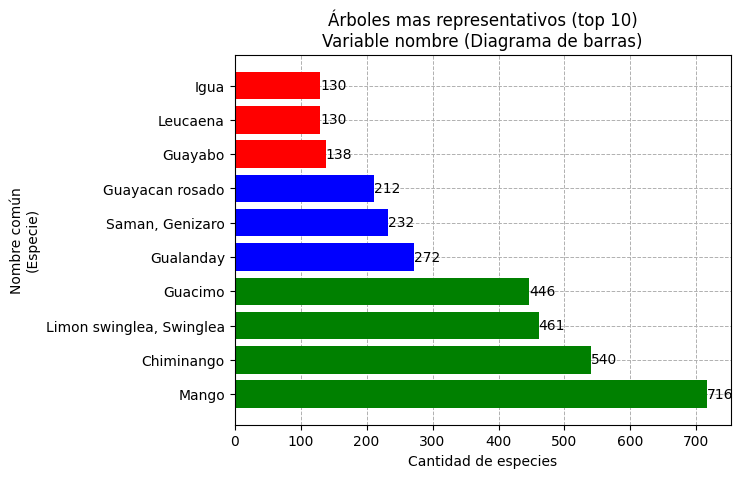

In [11]:
### Diagrama de Barras variable nombre

#x = [716, 540, 461, 446, 272]
#y = ['Mango','Chiminango','Limon swinglea', 'Guacimo', 'Gualanday',]

#Se escogen los 10 datos mas representativos debido a la cantidad de árboles existentes.
top10 = datos['nombre_comun'].value_counts().head(10)
x = top10.values
y = top10.keys()

colores = ['green' if i > 400 else 'red' if i < 200 else 'blue' for i in x]

plt.barh(y, x, color=colores, zorder=2)
plt.title('Árboles mas representativos (top 10)\nVariable nombre (Diagrama de barras)')
plt.ylabel('Nombre común\n(Especie)')
plt.xlabel('Cantidad de especies')

for i, v in enumerate(x):
    plt.text(v, i, str(v), color='black', va='center')

plt.grid(axis='y')
plt.grid(axis='x', zorder=1)
plt.grid(linestyle='--', linewidth=0.7)
plt.show()



In [12]:
#Variable edad (conteo y porcentaje)
datos['edad'].value_counts()
print(datos['edad'].value_counts())
print('\n' + 'Porcentaje %')
porcentaje_edad = datos['edad'].value_counts(normalize=True) * 100
print(porcentaje_edad)

edad
Maduro     4995
Longevo     850
Juvenil     571
Name: count, dtype: int64

Porcentaje %
edad
Maduro     77.852244
Longevo    13.248130
Juvenil     8.899626
Name: proportion, dtype: float64


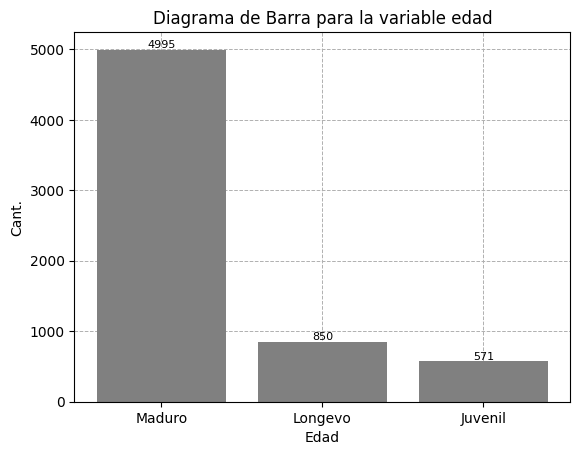

In [13]:
### Diagrama de Barras variable edad

x = ['Maduro','Longevo','Juvenil']
y = [4995, 850, 571]
plt.bar(x,y, color = 'gray', zorder=2)
plt.title('Diagrama de Barra para la variable edad')
plt.ylabel('Cant.')
plt.xlabel('Edad')

##valores de cada categoría
for i, value in enumerate(y):
    plt.text(i, value, f'{value}', ha='center', va='bottom', fontsize=8)

plt.grid(zorder=1)
plt.grid(linestyle='--', linewidth=0.7)
plt.show()

In [14]:
#variable emplazamiento (conteo y porcentaje)
datos['emplazamiento'].value_counts()
print(datos['emplazamiento'].value_counts())
print('\n' + 'Porcentaje %')
porcentaje_emplazamiento = datos['emplazamiento'].value_counts(normalize=True) * 100
print(porcentaje_emplazamiento)

emplazamiento
Escenario depor/cult    5435
Anden                    366
Separador Vial           321
Paseos                   152
Bahia de estacionami     107
Rondas de canales         32
Parque Urbano              2
Bulevares                  1
Name: count, dtype: int64

Porcentaje %
emplazamiento
Escenario depor/cult    84.710100
Anden                    5.704489
Separador Vial           5.003117
Paseos                   2.369077
Bahia de estacionami     1.667706
Rondas de canales        0.498753
Parque Urbano            0.031172
Bulevares                0.015586
Name: proportion, dtype: float64


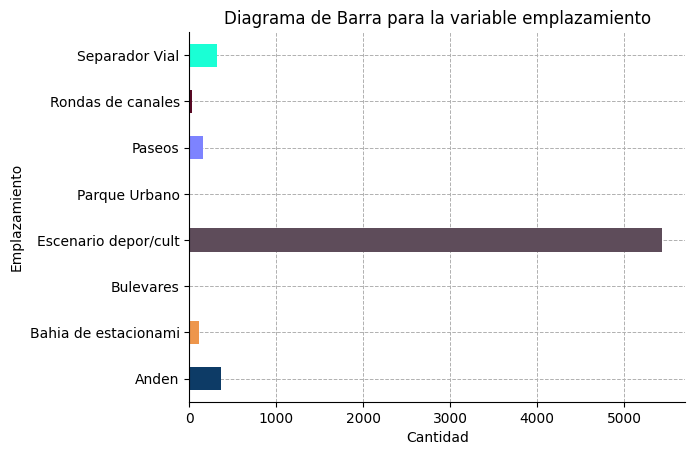

In [15]:
datos.groupby('emplazamiento').size().plot(kind='barh', color=['#0D3B66', '#EE964B', '#F4D35E', '#5E4C5A', '#55917F', '#7D83FF', '#590925', '#1AFFD5'], zorder=2)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Diagrama de Barra para la variable emplazamiento')
plt.ylabel('Emplazamiento')
plt.xlabel('Cantidad')

plt.grid(zorder=1)
plt.grid(linestyle='--', linewidth=0.7)
plt.show()

In [16]:
#variable raiz (conteo y porcentaje)
datos['raiz'].value_counts()
print(datos['raiz'].value_counts())
print('\n' + 'Porcentaje %')
porcentaje_raiz = datos['raiz'].value_counts(normalize=True) * 100
print(porcentaje_raiz)

raiz
Subterranea    6414
Aerea             2
Name: count, dtype: int64

Porcentaje %
raiz
Subterranea    99.968828
Aerea           0.031172
Name: proportion, dtype: float64


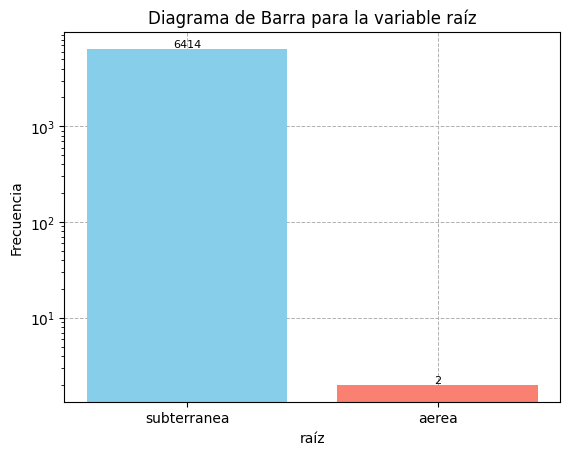

In [17]:
##diagrama de barras
x = ['subterranea', 'aerea']
y = datos['raiz'].value_counts()
plt.bar(x, y, color=['skyblue', 'salmon'], zorder=2)
plt.yscale('log')
plt.ylabel('Frecuencia')
plt.xlabel('raíz')
plt.title('Diagrama de Barra para la variable raíz')

##valores de cada categoría
for i, value in enumerate(y):
    plt.text(i, value, f'{value}', ha='center', va='bottom', fontsize=8)

plt.grid()
plt.grid(linestyle='--', linewidth=0.7)
plt.show()

In [18]:
#variable raiz expuesta (conteo y porcentaje)
datos['raiz_expuesta'].value_counts()
print(datos['raiz_expuesta'].value_counts())
print('\n' + 'Porcentaje %')
porcentaje_raiz_expuesta = datos['raiz_expuesta'].value_counts(normalize=True) * 100
print(porcentaje_raiz_expuesta)

raiz_expuesta
No    4417
Si    1999
Name: count, dtype: int64

Porcentaje %
raiz_expuesta
No    68.843516
Si    31.156484
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Diagrama circular para la variable raíz expuesta')

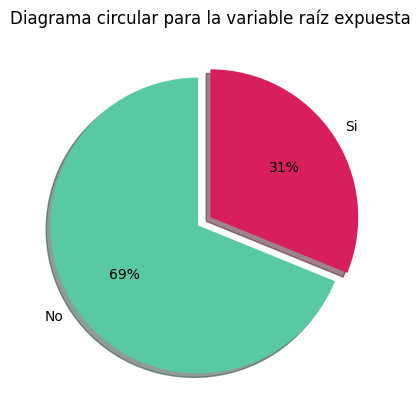

In [19]:
x = ['No', 'Si']
y = datos['raiz_expuesta'].value_counts()
plt.pie(y, labels=x, colors=['#59C9A5', '#D81E5B'], autopct='%1.0f%%', explode=[0.1, 0], shadow=True, startangle=90)
plt.title('Diagrama circular para la variable raíz expuesta')

In [20]:
#variable copa (conteo y porcentaje)
df_copa = datos['copa'].value_counts()
print(df_copa)

print('\n' + 'Porcentaje %')
porcentaje_copa = datos['copa'].value_counts(normalize=True) * 100
print(porcentaje_copa)

copa
Irregular      3276
Aparasolada    1760
Globosa        1276
Columnar         56
Conica           39
Ninguna           9
Name: count, dtype: int64

Porcentaje %
copa
Irregular      51.059850
Aparasolada    27.431421
Globosa        19.887781
Columnar        0.872818
Conica          0.607855
Ninguna         0.140274
Name: proportion, dtype: float64


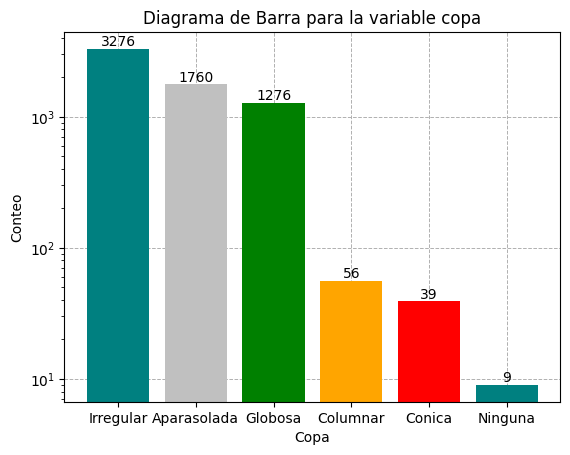

In [21]:
### Diagrama de Barras variable copa

x = df_copa.keys().to_list()
y = df_copa.to_list()

bars = plt.bar(x,y, color=['teal','silver','green','orange','red'], zorder=2)
plt.title('Diagrama de Barra para la variable copa')
plt.ylabel('Conteo')
plt.xlabel('Copa')
plt.yscale('log')

### Codigo para agregar los valores cuantitativos de cada barra
for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.grid(zorder=1)
plt.grid(linestyle='--', linewidth=0.7)
plt.show()

In [22]:
#variable densidad copa (conteo y porcentaje)
df_densidad_copa = datos['densidad_copa'].value_counts()
#df_densidad_copa = df.reindex(['Bajo (0 - 33%)','Medio (34 - 66%)', 'Alto (67 - 100%)'])
print(df_densidad_copa)

print('\n' + 'Porcentaje %')
porcentaje_densidad_copa = datos['densidad_copa'].value_counts(normalize=True) * 100
porcentaje_densidad_copa = porcentaje_densidad_copa.reindex(['Bajo (0 - 33%)','Medio (34 - 66%)', 'Alto (67 - 100%)'])
print(porcentaje_densidad_copa)

densidad_copa
Medio (34 - 66%)    2898
Alto (67 - 100%)    2162
Bajo (0 - 33%)      1356
Name: count, dtype: int64

Porcentaje %
densidad_copa
Bajo (0 - 33%)      21.134663
Medio (34 - 66%)    45.168329
Alto (67 - 100%)    33.697007
Name: proportion, dtype: float64


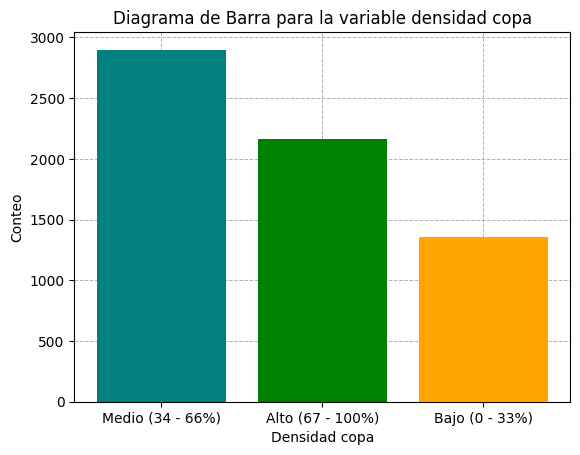

In [23]:
### Diagrama de Barras variable densidad copa

x = df_densidad_copa.keys().to_list()
y = df_densidad_copa.to_list()

plt.bar(x,y, color=['teal','green','orange'], zorder=2)
plt.ylabel('Conteo')
plt.xlabel('Densidad copa')
plt.title('Diagrama de Barra para la variable densidad copa')

plt.grid(zorder=1)
plt.grid(linestyle='--', linewidth=0.7)
plt.show()

In [24]:
#variable vitalidad (conteo y porcentaje)
df_vitalidad = datos['vitalidad'].value_counts()
print(df_vitalidad)

print('\n' + 'Porcentaje %')
porcentaje_vitalidad = datos['vitalidad'].value_counts(normalize=True) * 100
print(porcentaje_vitalidad)

vitalidad
Regular    4896
Sano       1460
Seco         60
Name: count, dtype: int64

Porcentaje %
vitalidad
Regular    76.309227
Sano       22.755611
Seco        0.935162
Name: proportion, dtype: float64


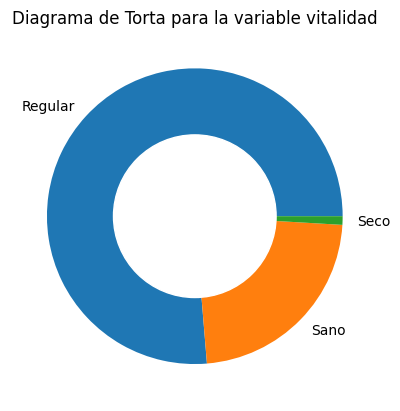

In [25]:
### Diagrama de Torta variable vitalidad

x = df_vitalidad.keys().to_list()
y = df_vitalidad.to_list()

plt.pie(y,labels=x)
plt.title('Diagrama de Torta para la variable vitalidad')

centro = plt.Circle((0,0), 0.55, color='white')

plt.gcf().gca().add_artist(centro)
plt.show()

In [26]:
#variable vegetacion (conteo y porcentaje)
df_vegetacion = datos['vegetacion'].value_counts()
print(df_vegetacion)

print('\n' + 'Porcentaje %')
porcentaje_vegetacion = datos['vegetacion'].value_counts(normalize=True) * 100
print(porcentaje_vegetacion)

vegetacion
Arbol               5345
Palma                596
Arbusto              388
Planta arbustiva      76
Bambu                 11
Name: count, dtype: int64

Porcentaje %
vegetacion
Arbol               83.307357
Palma                9.289277
Arbusto              6.047382
Planta arbustiva     1.184539
Bambu                0.171446
Name: proportion, dtype: float64


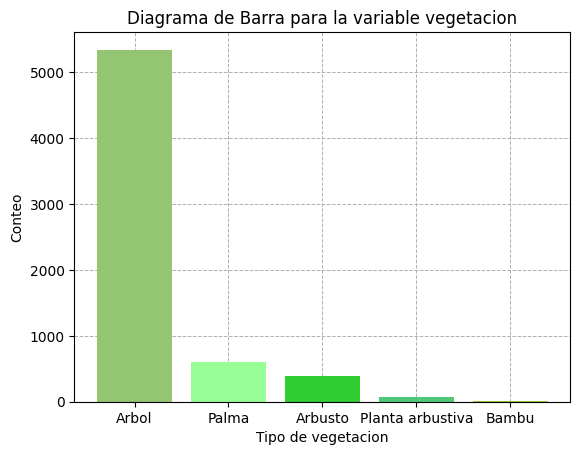

In [27]:
### Diagrama de Barras variable vegetación
x = df_vegetacion.keys().to_list()
y = df_vegetacion.to_list()
bars = plt.bar(x,y, color=['#93C572','#98FF98','#32CD32','#50C878','#9ACD32'], zorder=2)
plt.title('Diagrama de Barra para la variable vegetacion')
plt.ylabel('Conteo')
plt.xlabel('Tipo de vegetacion')

plt.grid(zorder=1)
plt.grid(linestyle='--', linewidth=0.7)
plt.show()

# Variables cuantitativas

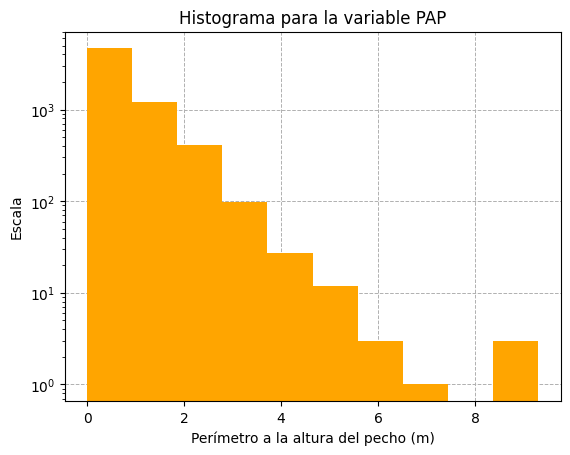

In [28]:
#Variable PAP (PERIMETRO A LA ALTURA DEL PECHO)
df_pap = datos['pap']

plt.hist(df_pap, zorder=2, color='orange')
plt.grid(zorder=1)
plt.grid(linestyle='--', linewidth=0.7)
plt.title('Histograma para la variable PAP')
plt.ylabel('Escala')
plt.yscale('log')
plt.xlabel('Perímetro a la altura del pecho (m)')
plt.show()



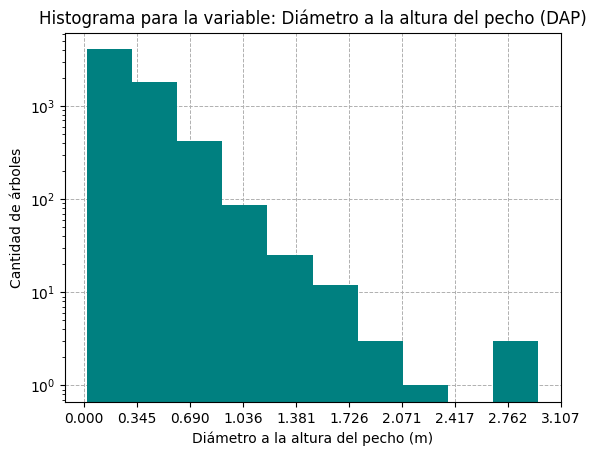

In [29]:
#variable DAP
df_dap = datos['DAP']

plt.hist(df_dap, color='teal', zorder=2)
plt.grid(zorder=1)
plt.grid(linestyle='--', linewidth=0.7)
plt.title('Histograma para la variable: Diámetro a la altura del pecho (DAP)')
plt.xlabel('Diámetro a la altura del pecho (m)')
plt.ylabel('Cantidad de árboles')
x_min, x_max = plt.xlim()
plt.xticks(np.linspace(0, x_max, 10))
plt.yscale('log')

plt.show()

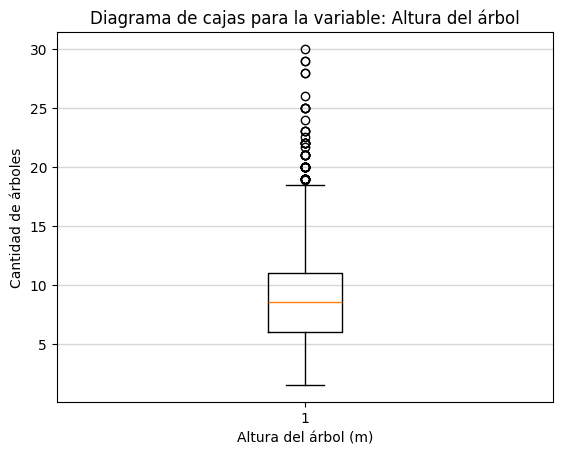

In [30]:
#variable Altura del árbol
df_altura_arbol = datos['altura_arbol'].values

plt.boxplot(df_altura_arbol, zorder=2)
plt.title('Diagrama de cajas para la variable: Altura del árbol')
plt.grid(axis='y', alpha=0.5, linestyle='-', linewidth=1)
plt.xlabel('Altura del árbol (m)')
plt.ylabel('Cantidad de árboles')
plt.show()


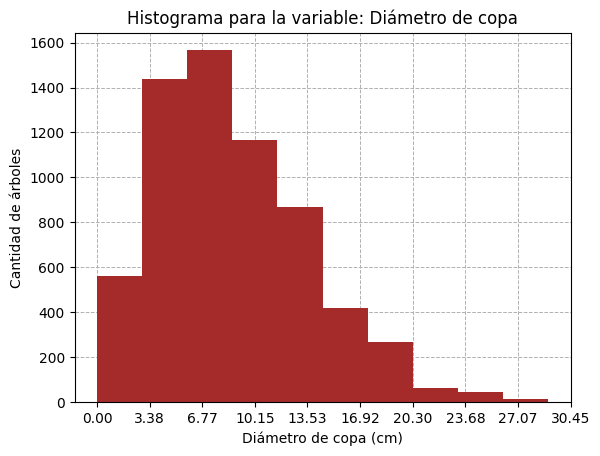

In [31]:
#variable Diámetro copa
df_diametro_copa = datos['diametro_copa'].sort_values()

plt.hist(df_diametro_copa,color='brown', zorder=2)
plt.title('Histograma para la variable: Diámetro de copa')
plt.xlabel('Diámetro de copa (cm)')
plt.ylabel('Cantidad de árboles')
x_min, x_max = plt.xlim()
plt.xticks(np.linspace(0, x_max, 10))

plt.grid(zorder=1)
plt.grid(linestyle='--', linewidth=0.7)
plt.show()

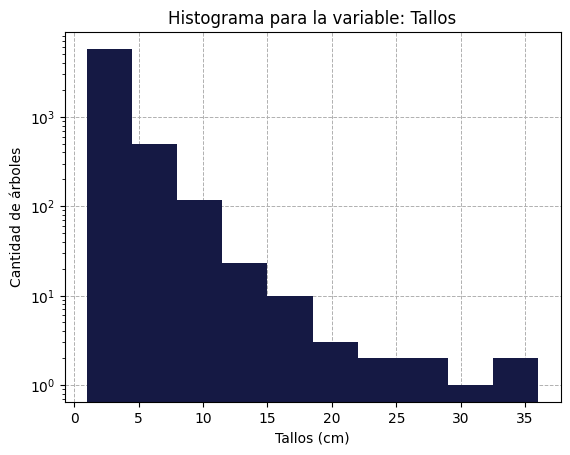

In [32]:
#variable Tallos

df_tallos = datos['tallos'].sort_values()

plt.hist(df_tallos, color='#151944', zorder=2)
plt.title('Histograma para la variable: Tallos')
plt.xlabel('Tallos (cm)')
plt.ylabel('Cantidad de árboles')
plt.yscale('log')

plt.grid(zorder=1)
plt.grid(linestyle='--', linewidth=0.7)
plt.show()

# Realización del Avance 2

1. Analisis con dos variables: Se escoge la variable cuantitativa PAP
(Perimetro a la altura del pecho) vs. la altura de la especie. Para este caso
se analizaran todos los datos de los individuos.

In [33]:
#Carga de paquetes
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [34]:
print(datos.columns)

Index(['nombre_comun', 'vegetacion', 'edad', 'emplazamiento', 'pap', 'DAP',
       'altura_arbol', 'diametro_copa', 'tallos', 'raiz', 'raiz_expuesta',
       'copa', 'densidad_copa', 'vitalidad'],
      dtype='object')


In [35]:
#Selección de variables y correlación de Pearson
pap = datos['pap']
altura_arbol = datos['altura_arbol']
#stats.pearsonr(pap, altura_arbol)
pearson_corr = datos['pap'].corr(datos['altura_arbol'])
print(pearson_corr)

0.38045259047223856


Se escogieron las variables de pap y de altura para saber si el valor del pap tenia relacion con la altura de arbol, si bien es positiva se observa que no tienen una correlacion fuerte.

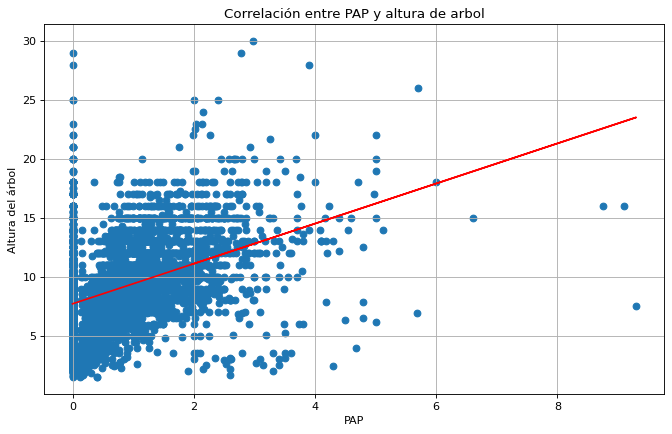

In [36]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
plt.title('Correlación entre PAP y altura de arbol')
plt.scatter(pap, altura_arbol)
plt.xlabel('PAP')
plt.ylabel('Altura del árbol')
plt.grid()
trend = np.polyfit(pap, altura_arbol, 1)
trend_line = np.poly1d(trend)(pap)
plt.plot(pap, trend_line, color='red')
plt.show()

Ahora se va a comparar la variable de altura de arbol con cada variable cuantitativa: DAP, diametro copa y tallos para observar como es la relación de cada variable.

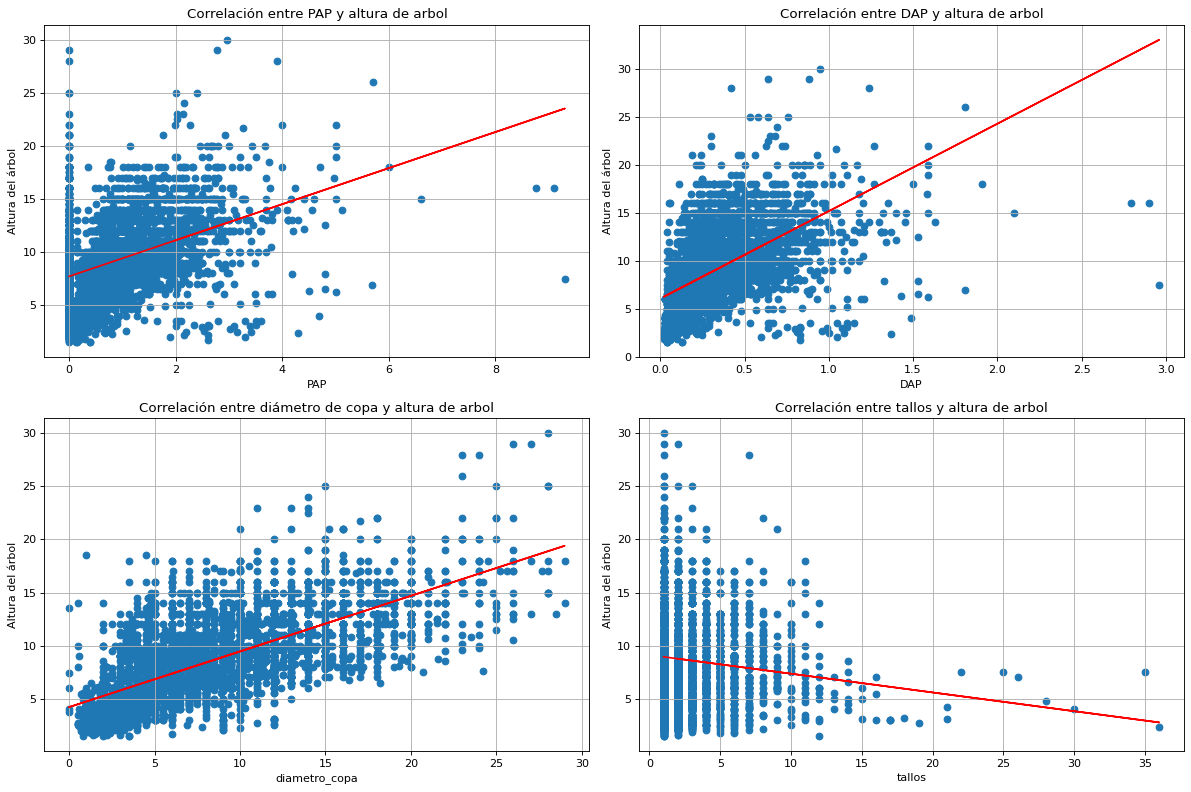

In [37]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)

#pap vs altura
plt.subplot(2, 2, 1)
plt.title('Correlación entre PAP y altura de arbol')
plt.scatter(pap, altura_arbol)
plt.xlabel('PAP')
plt.ylabel('Altura del árbol')
plt.grid()
trend = np.polyfit(pap, altura_arbol, 1)
trend_line = np.poly1d(trend)(pap)
plt.plot(datos['pap'], trend_line, color='red')

#dap vs altura
plt.subplot(2, 2, 2)
plt.title('Correlación entre DAP y altura de arbol')
plt.scatter(datos['DAP'], altura_arbol)
plt.xlabel('DAP')
plt.ylabel('Altura del árbol')
plt.grid()
trend = np.polyfit(datos['DAP'], altura_arbol, 1)
trend_line = np.poly1d(trend)(datos['DAP'])
plt.plot(datos['DAP'], trend_line, color='red')

#diametro copa vs altura
plt.subplot(2, 2, 3)
plt.title('Correlación entre diámetro de copa y altura de arbol')
plt.scatter(datos['diametro_copa'], altura_arbol)
plt.xlabel('diametro_copa')
plt.ylabel('Altura del árbol')
plt.grid()
trend = np.polyfit(datos['diametro_copa'], altura_arbol, 1)
trend_line = np.poly1d(trend)(datos['diametro_copa'])
plt.plot(datos['diametro_copa'], trend_line, color='red')

#tallos vs altura
plt.subplot(2, 2, 4)
plt.title('Correlación entre tallos y altura de arbol')
plt.scatter(datos['tallos'], altura_arbol)
plt.xlabel('tallos')
plt.ylabel('Altura del árbol')
plt.grid()
trend = np.polyfit(datos['tallos'], altura_arbol, 1)
trend_line = np.poly1d(trend)(datos['tallos'])
plt.plot(datos['tallos'], trend_line, color='red')

plt.tight_layout()
plt.show()

Matriz de correlación:
                     pap       DAP  altura_arbol  diametro_copa    tallos
pap            1.000000  0.843367      0.380453       0.360995 -0.402279
DAP            0.843367  1.000000      0.562828       0.631254 -0.253212
altura_arbol   0.380453  0.562828      1.000000       0.690852 -0.100299
diametro_copa  0.360995  0.631254      0.690852       1.000000  0.018323
tallos        -0.402279 -0.253212     -0.100299       0.018323  1.000000


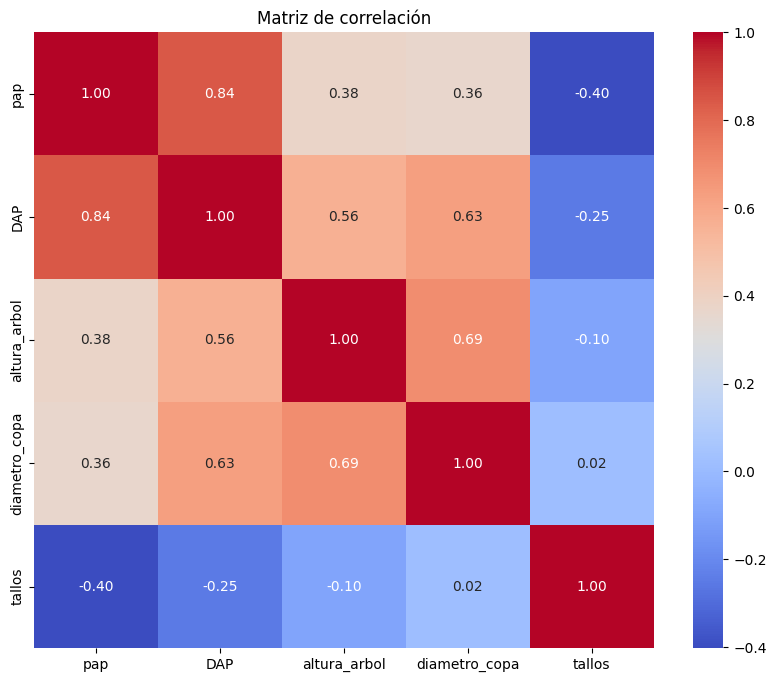

In [38]:
df = pd.DataFrame(datos)
selected_columns = ['pap', 'DAP', 'altura_arbol', 'diametro_copa', 'tallos']
df = df[selected_columns]

correlation_matrix = df.corr()
print("Matriz de correlación:\n", correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


In [39]:
df = pd.read_csv('arbolesUV.csv')
print(df.head())

  nombre_comun vegetacion     edad         emplazamiento pap   DAP  \
0      Guayabo    Arbusto  Juvenil  Escenario depor/cult   0  0,04   
1  Palma areca      Palma  Juvenil  Escenario depor/cult   0  0,07   
2        Mango      Arbol   Maduro  Escenario depor/cult   0  0,19   
3        Mango      Arbol   Maduro  Escenario depor/cult   0  0,28   
4   Chiminango      Arbol   Maduro  Escenario depor/cult   0  0,22   

  altura_arbol diametro_copa  tallos         raiz raiz_expuesta         copa  \
0          3,9           4,5       2  Subterranea            No    Irregular   
1          4,2           5,5       7  Subterranea            No  Aparasolada   
2            8             9       5  Subterranea            Si  Aparasolada   
3          8,5           9,5       3  Subterranea            Si  Aparasolada   
4          8,5             8       4  Subterranea            No      Globosa   

      densidad_copa vitalidad  
0  Medio (34 - 66%)      Sano  
1  Medio (34 - 66%)      Sano  
2 

In [41]:
species_counts = df['nombre_comun'].value_counts()
top_species = species_counts.head(10)
print(top_species)

nombre_comun
Mango                       716
Chiminango                  540
Limon swinglea, Swinglea    461
Guacimo                     446
Gualanday                   272
Saman, Genizaro             232
Guayacan rosado             212
Guayabo                     138
Leucaena                    130
Igua                        130
Name: count, dtype: int64


<ipython-input-41-1c93264c7edd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emplazamiento', y='altura_arbol', data=datos, palette='Set3')


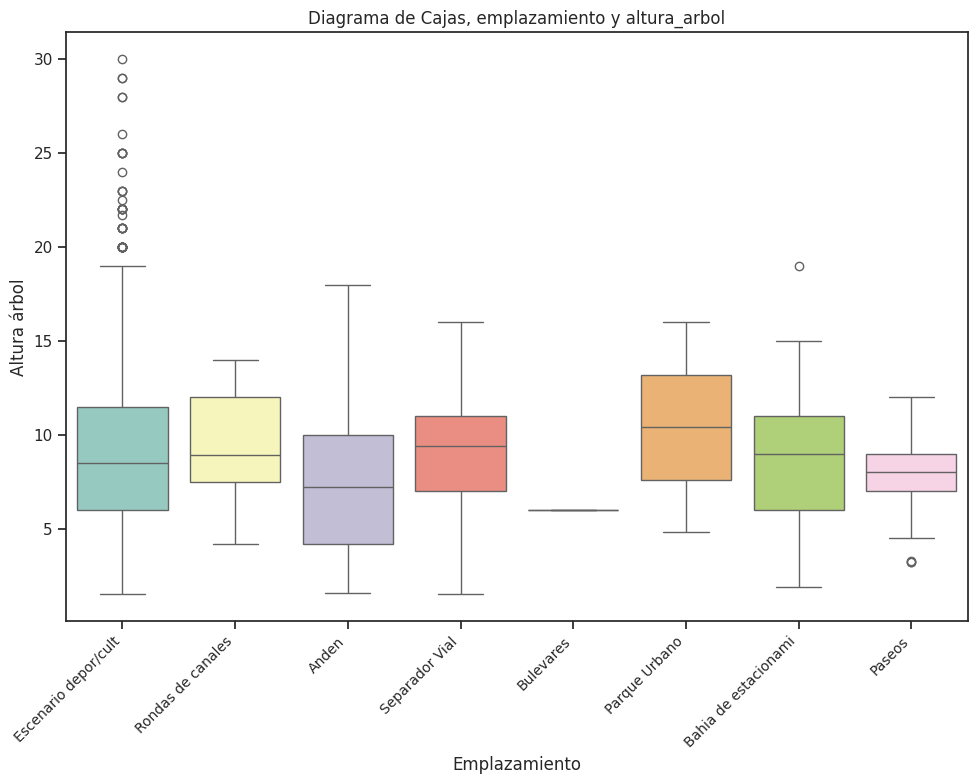

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='emplazamiento', y='altura_arbol', data=datos, palette='Set3')
plt.title('Diagrama de Cajas, emplazamiento y altura_arbol')
plt.xlabel('Emplazamiento')
plt.ylabel('Altura árbol')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
### Tabla cruzada de las variables "Vegetación" y "Edad"

pd.crosstab(datos.vegetacion, datos.edad)

edad,Juvenil,Longevo,Maduro
vegetacion,,,
Arbol,460,694,4191
Arbusto,24,13,351
Bambu,0,1,10
Palma,86,142,368
Planta arbustiva,1,0,75


[Text(0.5, 1.0, 'Diagrama de barras variables Vegetación y Edad'),
 Text(0, 0.5, 'Cantidad'),
 Text(0.5, 0, 'Vegetación')]

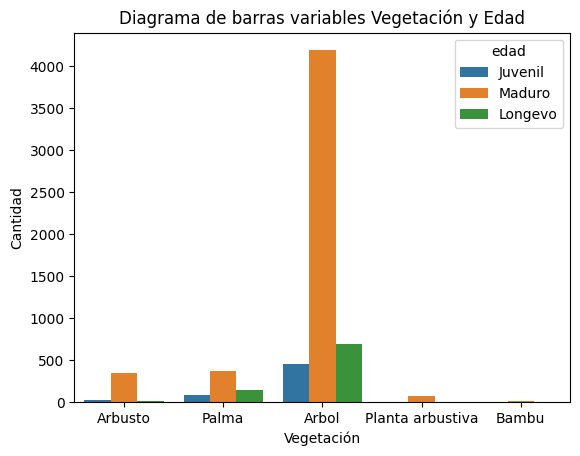

In [ ]:
### DataFrame con los datos
df = pd.DataFrame(datos)

### Diagrama de barras apiladas
sns.countplot(x='vegetacion', hue='edad', data=df).set(title='Diagrama de barras variables Vegetación y Edad', ylabel='Cantidad', xlabel='Vegetación')